# Data Exploration and Data Analysis
Notebook para exploração dos dados
- - - 
Leonardo Goshi Sanches
- - -
## Checklist
    - Carregar dados
    
    - Verificar valores Nulos
        
    - Verificar tipo dos dados
    
    - Substituir os valores Nulos
    
    - Verificar Outliers
    
    - Verificar Correlações

- - -
### Bibliotecas

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load data

Faz a leitura dos arquivos csv;


In [2]:
data_path = "../data/"
csv_list = ["X_test.csv", "X_train.csv", "y_test.csv", "y_train.csv"]


x_test = pd.read_csv(data_path+csv_list[0], header=None)
x_train = pd.read_csv(data_path+csv_list[1], header=None)
y_test = pd.read_csv(data_path + csv_list[2], header=None)
y_train = pd.read_csv(data_path + csv_list[3], header=None)

### Verificando os dados

- Existem dados faltantes?
    - Sim, alguns NaN em x_train.
- Qual o tipo dos dados?
    - Todos float64

In [3]:
print(x_train.info())
print(x_test.info())
print(y_train.info())
print(y_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       149 non-null    float64
 1   1       148 non-null    float64
 2   2       148 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    float64
 5   5       150 non-null    float64
 6   6       150 non-null    float64
 7   7       150 non-null    float64
 8   8       150 non-null    float64
 9   9       142 non-null    float64
dtypes: float64(10)
memory usage: 11.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       50 non-null     float64
 1   1       50 non-null     float64
 2   2       50 non-null     float64
 3   3       50 non-null     float64
 4   4       50 non-null     float64
 5   5       50 non-null     float64
 6   

### Onde estão os NaN?
- Encontra os valores NaNs e substitui pela média da coluna

In [4]:
print(x_train[x_train.isna().any(axis=1)])
#x_train = x_train.fillna(0)

for i in range(len(x_train.columns)):
    x_train[i] = x_train[i].fillna(x_train[i].mean())

print(x_train[x_train.isna().any(axis=1)])

            0         1         2         3         4         5         6  \
10  -1.704651       NaN -2.973315  0.033317 -0.248889 -0.450176  0.132428   
12  -1.540616  2.046714 -1.396999 -1.097172 -0.238713 -1.429067  0.949005   
21   0.527369 -0.374303       NaN -1.429763  0.407707 -0.828280  0.423457   
29   1.559315 -1.092689  0.758042 -1.199440  0.176370 -0.875731  0.117608   
34   0.539813  0.543173  0.963745  1.253726 -0.220131 -0.252270  0.010037   
48  -0.451672 -1.137542 -0.135877  0.634379 -0.013558  0.375897 -0.236582   
62  -1.944540       NaN  1.538754  2.397073  1.556208 -0.202683 -0.108906   
70   0.567943 -0.101638  0.069251 -1.161602  0.327026  0.567333  0.901592   
81   0.321287 -2.437027       NaN -0.642481  0.292833 -0.463981  0.386734   
91  -0.453400  0.609100 -0.852249 -0.054550  1.090795 -1.846342 -0.412434   
105 -0.173456  0.031924 -0.860370  1.417879 -0.216362 -1.015489 -0.725975   
139  1.356979  0.484686 -0.256115  1.354626  2.075951  0.666880 -1.013720   

## Outlier Analysis

Existem outliers no dataset?
>Sim, nota-se valores bem longe da média em x_train. 

>Em y_train e y_test não há.
- - -
    
**Método outlier_plot**: Faz o Boxplot dos datasets.

- Parâmetros:
    
    - *data*: dataframe
    
    - *ax_x, ax_y*: Localização do subplot
    
    - *is_log_scale*: transforma o eixo X em valores de log.
    

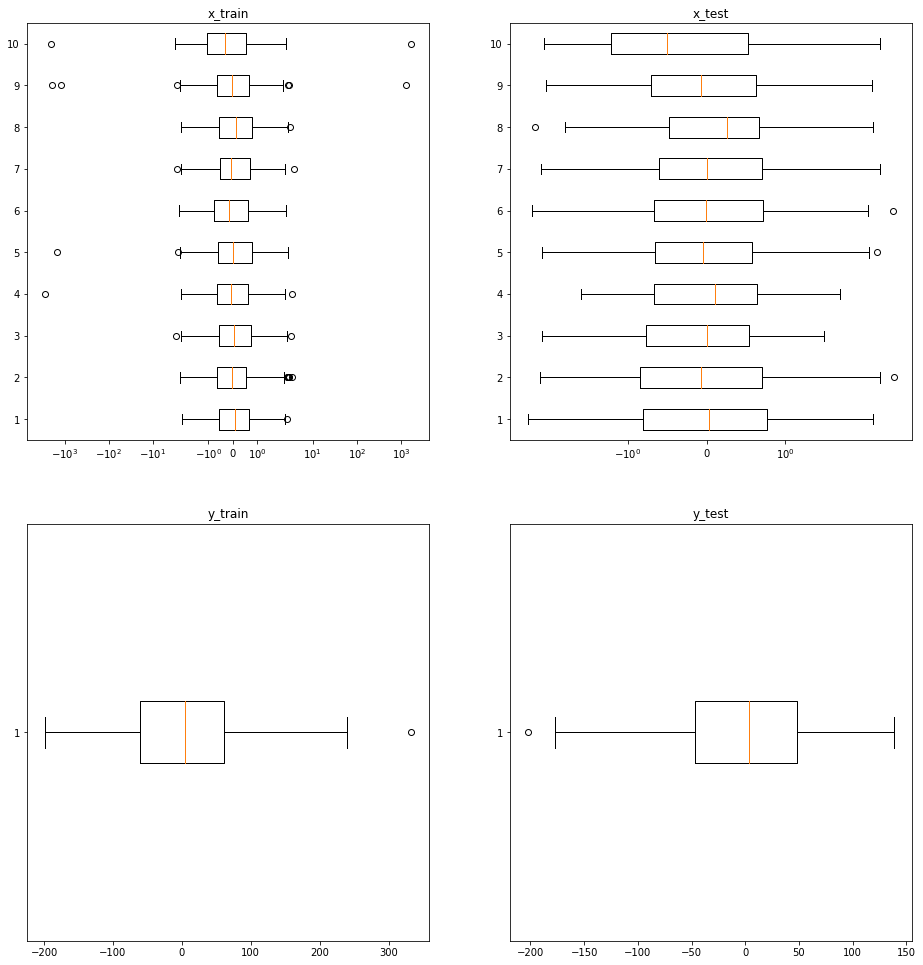

In [5]:
fig, ax = plt.subplots(2,2, figsize=(15,15))
fig.subplots_adjust(left = 0.08, right = 0.9, bottom = 0.05, top=0.9)


def outlier_plot(data, title:str='', ax_x:int=0, ax_y:int=0, is_log_scale:bool=False):
    ax[ax_x, ax_y].boxplot(data, vert=False)
    if is_log_scale:
        ax[ax_x, ax_y].set_xscale('symlog')
    ax[ax_x, ax_y].set_title(title)


outlier_plot(x_train, 'x_train', ax_x=0, ax_y=0, is_log_scale=True)
outlier_plot(x_test, 'x_test', ax_x=0, ax_y=1, is_log_scale = True)
outlier_plot(y_train, 'y_train', ax_x=1, ax_y=0)
outlier_plot(y_test, 'y_test', ax_x=1, ax_y=1)
plt.show()

### Localizar e Substituir os Outliers

- Procura os valores Maiores que 4 e Menores -4 e substitui pelo valor do quartil 50.

In [6]:
#x_train.describe()
for i in range(len(x_train.columns)):
    x_train[i] = np.where(x_train[i] > 4, x_train[i].quantile(.5), x_train[i])
    x_train[i] = np.where(x_train[i] < -4, x_train[i].quantile(.5), x_train[i])
x_train.describe()


,0,1,2,3,4,5,6,7,8,9
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.053781,0.028751,0.101332,-0.014209,0.071241,-0.072433,0.038557,0.103699,-0.022972,-0.272984
std,0.985513,1.054937,1.023854,0.941785,1.103014,0.979966,0.987008,1.046627,1.034223,1.189932
min,-2.229259,-2.437027,-2.973315,-2.268620,-2.674355,-2.593049,-2.874969,-2.305322,-2.892240,-3.209955
25%,-0.578574,-0.655137,-0.579357,-0.612612,-0.584675,-0.785925,-0.537900,-0.563654,-0.571572,-1.054253
50%,0.100712,-0.021766,0.028943,-0.056033,0.036325,-0.162589,-0.065427,0.127817,-0.041774,-0.317120
75%,0.680711,0.536576,0.757237,0.633470,0.787527,0.617043,0.701296,0.778635,0.591761,0.523952
max,2.647419,3.465227,3.173391,3.334204,2.809701,2.527071,3.857940,3.075574,2.883969,2.539432


### Correlações

- Existem correlações entre as colunas?
    > não

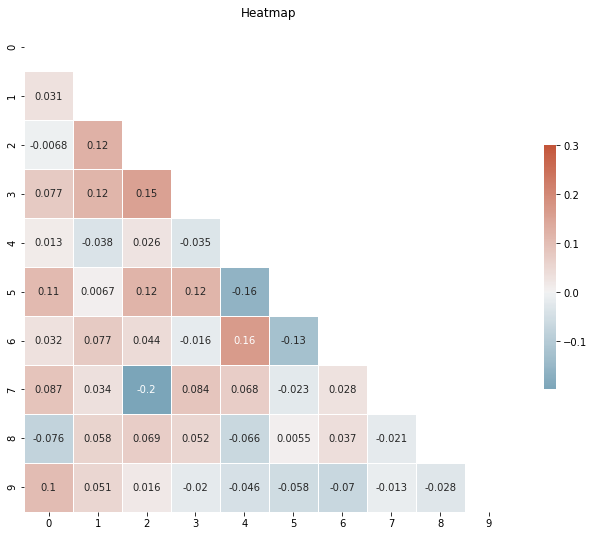

In [16]:
corr = x_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center = 0, square = True, linewidth=.5, cbar_kws={"shrink":.5}, annot=True)
ax.set_title("Heatmap")
plt.show()

### Salvar os datasets

In [149]:
x_train.to_csv(data_path + "x_train_pos.csv", index=False)
x_test.to_csv(data_path + "x_test_pos.csv", index=False)
y_train.to_csv(data_path + "y_train_pos.csv", index=False)
y_test.to_csv(data_path + "y_test_pos.csv", index=False)